### sklearn 라이브러리를 활용한 mnist 손글씨 10분만에 70,000개 분류하기

#### sklearn에서 제공하는 mnist dataset load

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape
# (70000, 784)

((70000, 784), (70000,))

In [2]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### Dataset을 train data와 test data로 split하기

> dataset을 split 하는 방법은 직접 구현할 수 도 있고 sklearn에서 제공하는 라이브러리를 사용해도 됩니다.

먼저, 구현을 해보자면

In [3]:
split_ratio = 0.9
print(mnist.data.shape[0])
n_train = int(mnist.data.shape[0] * split_ratio)
print(n_train)
# 63000

n_test = mnist.data.shape[0] - n_train
print(n_test)
#7000

X_train = mnist.data[:n_train]
y_train = mnist.target[:n_train]
print(X_train.shape, y_train.shape)
# ((63000, 784), (63000,))

X_test = mnist.data[n_train:]
y_test = mnist.target[n_train:]
print(X_test.shape, y_test.shape)
# ((7000, 784), (7000,))

# Checking uniqueness of the target
import numpy as np
print(np.unique(y_train))
# array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

70000
63000
7000
(63000, 784) (63000,)
(7000, 784) (7000,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


> shuffling은 적용하지 않았습니다. 
  dataset을 shuffling을 하려면 numpy.random.permutation 을 활용하면 손쉽게 dataset을 shuffling 할 수 있습니다. 
  sklearn 에서 제공하는 train_test_split 모듈을 사용하면 매우 손쉽게 데이터셋을 분류할 수 있습니다.

간단한 예제를 보자면,



default로 0.75: 0.25 ration로 train 과 test 로 분류해 줍니다.

ratio는 test_size=0.3 와 같은 parameter를 train_test_split 에 지정해 주면 조절할 수 있습니다.

또한 shuffle=False로 지정해 준다면, dataset의 shuffle을 안하도록 할 수도 있습니다.

뭔가 귀찮은 일을 train_test_split 모듈이 다 해주고 있는 느낌이랄까요.

하나만 더 comment를 하자면, randome_state=123 처럼 random state 값을 지정해 주면, 해당 값에 기반하여 random shuffling 됩니다. 즉 123 값을 넘겨 주면, cell을 다시 실행하더라도 똑같이 섞이게 됩니다.

### RandomForestClassifier를 활용한 초간단 machine learning

In [4]:
from sklearn.ensemble import RandomForestClassifier

# module loading
clf = RandomForestClassifier()

# train data!
clf.fit(X_train, y_train)
      # X : 독립변수 y : 그에 대한 답

# make prediction
prediction = clf.predict(X_test)
print(prediction.shape)
# 7000

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(7000,)


In [5]:
# accuracy
result = (prediction == y_test).mean()
print(result)
# 0.9617142857142857

0.9582857142857143


### Visualization

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# 랜덤하게 몇 가지 data 가져오기
random_pick = np.random.randint(low=0, high=n_test, size=10)
print(random_pick)
# array([3898, 6815, 6640, 2924,  451, 2688,  633, 6563, 5993, 4024])
# random으로 무작위하게

[  82 3393  573 2925  384  100 3082 1705 4768 4892]


['3' '9' '7' '3' '2' '5' '0' '2' '6' '9']


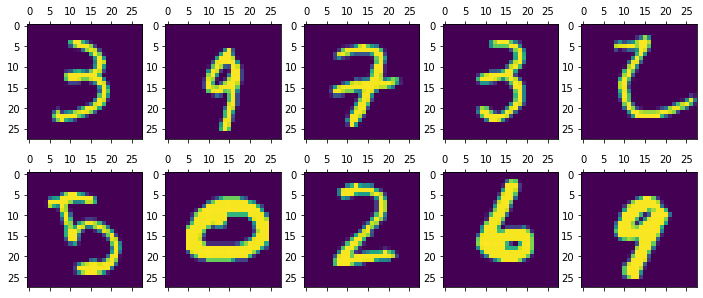

In [29]:
figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = mnist.data[n_train + random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)
    
print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

image_path : ./my_data/3.png


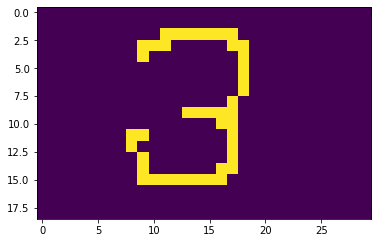

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 255 255 255   0   0   0   0   0 255
  255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 255   0   0   0   0   0   0   0   0 255   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

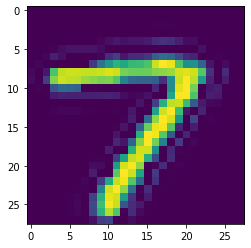

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   3  10  16  11  15
   15  18  31  36  33  21   8   8   0   0   0   0   0   0   0   0   0   2
    9  13  13  13  13   8   0   0   0   0   0   0   0   0   0   0   0   0
   11   0   0   0   0   0   0   0   4  22  11   0   0   0   0   4  33  47
   16  30  32  40  77  92  86  58  31  24   0   0   2   0   0   0   0   3
    0   0   0   0   0   0  41  98 133 165 152 170 172 182 236 255 248 184
  126 130  80  13   0   7   0   0   5   0  16 183 231 237 236 233 233 236
  241 236 203 197 196 198 208 211 217 

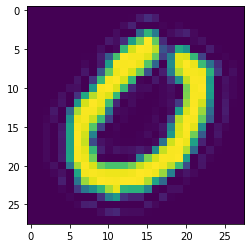

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1  16  33  19   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   8  23   0   0
    0   3   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   8   0   0  87 167 105   0   8  16  23   6   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0  17   9  33 143
  201 255 194  31   0   0   0   5  11   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   9   0   6 171 239 255 254 230  66  41 156 131   0
    0  19   2   0   0   0   0   0   0   0   0   0   0   1   1  19  74 181
  255 252 252 245 195  48 109 244 241 171  50   0   0   3   0   0   0   0
    0   0   0   0   0   5   0  17 143 253 253 254 248 187  84   0 124 244
  255 248 174  94  31   0   3   0   0   0   0   0   0   0   0  15   0  69
  195 249 254 241 196  64   0  20 109 

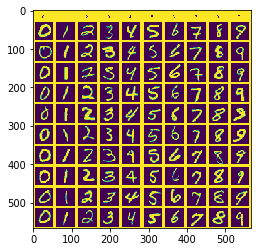

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 

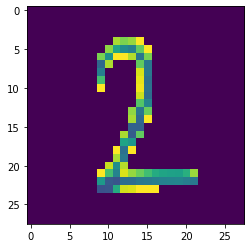

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 205 215
  255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 212 150 124 111 194 255   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 204 131 255
  255 226  99 203   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  86 224   0   0   0 194 102   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 110
    0   0   0   0 240 102   0   0   0 

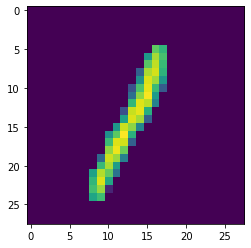

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 192 168   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 140 221 181   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0 189 231 172   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  78 223 239 165   0 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
%matplotlib inline

for image_path in glob.glob("./my_data/*.png"):
    print("image_path : {}".format(image_path))
    img = Image.open(image_path).convert("L")
    plt.imshow(img)
    plt.show()
    img = np.resize(img, (1,784))
    print(img)
    
    prediction = clf.predict(img)
    print(prediction)

In [31]:
X_test[3027]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         9.,  76., 255., 159.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  93., 25